In [1]:
import os
import time
from math import inf
import matplotlib.pyplot as plt

In [2]:
MAX_LENGTH = 30*1000*1000
SPACE_CHAR = "\t"
SIZE_LIMITE = 500*1000*1000 # 500Mo

In [3]:
def compter_aretes(INPUT):
    
    cpt = 0
    iFile = open(INPUT,'r')
    line = iFile.readline()[:-1]
    while line != "":
        cpt += 1
        line = iFile.readline()[:-1]
    iFile.close()
    return cpt

def number_of_node(INPUT):
    iFile = open(INPUT,'r')
    line = iFile.readline()[:-1]
    D = {}
    while line != "":
        u,v = line.split(SPACE_CHAR)
        D[u] = True
        D[v] = True
        line = iFile.readline()[:-1]
    iFile.close()
    return len(D.keys())

In [4]:
def clean_small_data(INPUT,OUTPUT):
    
    iFile = open(INPUT,'r')
    LINES = iFile.read()[:-1].split('\n')
    iFile.close()
    
    while LINES[0][0] is '#':
        del LINES[0]
    
    for i in range(len(LINES)):
        a,b = int(LINES[i].split(SPACE_CHAR)[0]),int(LINES[i].split(SPACE_CHAR)[1])
        if a > b: a,b = b,a
        LINES[i] = [a,b]
    LINES.sort()
    PRED = None
    oFile = open(OUTPUT,'w')
    for LINE in LINES:
        if LINE[0] == LINE[1]: continue
        LINE = str(LINE[0]) + SPACE_CHAR + str(LINE[1]) + '\n'
        if PRED != LINE:
            PRED = LINE
            oFile.write(LINE)
    oFile.close()

In [5]:
def clean_large_data(INPUT,OUTPUT):
    
    if os.path.getsize(INPUT) < SIZE_LIMITE:
        return clean_small_data(INPUT,OUTPUT)
    iFile = open(INPUT, 'r')
    FIRST_CHAR = iFile.read(1)
    while FIRST_CHAR == '#':
        iFile.readline()
        FIRST_CHAR = iFile.read(1)
    
    TEMPORARIES = []
    i = 0
    LINE = FIRST_CHAR + iFile.readline()[:-1]
    while LINE != '':
        a,b = int(LINE.split(SPACE_CHAR)[0]),int(LINE.split(SPACE_CHAR)[1])
        if a > b: a,b = b,a
        if i % MAX_LENGTH == 0:
            TEMPORARIES.append(open(str(len(TEMPORARIES)) + ".tmp",'w'))
        if a != b:
            TEMPORARIES[-1].write(str(a) + SPACE_CHAR + str(b) + '\n')
        LINE = iFile.readline()[:-1]
        i = i + 1
    iFile.close()
    
    for i in range(len(TEMPORARIES)):
        TEMPORARIES[i] = open(str(i) + ".tmp", 'r')
        LINES = TEMPORARIES[i].read()[:-1].split('\n')
        for j in range(len(LINES)):
            LINES[j] = [int(LINES[j].split(SPACE_CHAR)[0]),int(LINES[j].split(SPACE_CHAR)[1])]
        LINES.sort()
        TEMPORARIES[i] = open(str(i) + ".tmp",'w')
        for LINE in LINES:
            TEMPORARIES[i].write(str(LINE[0]) + SPACE_CHAR + str(LINE[1]) + '\n')
        TEMPORARIES[i] = open(str(i) + ".tmp",'r')
    
    
    oFile = open(OUTPUT, 'w')
    LINES = [file.readline()[:-1] for file in TEMPORARIES]
    PRED = None
    while LINES != len(LINES)*['']:
        INDEX_MIN = 0
        LINE_MIN = LINES[0]
        for i in range(len(LINES)):
            if LINES[i] == '': continue
            if LINE_MIN == '': 
                INDEX_MIN,LINE_MIN = i,LINES[i] 
                continue
            L1 = [int(LINE_MIN.split(SPACE_CHAR)[0]),int(LINE_MIN.split(SPACE_CHAR)[1])]
            L2 = [int(LINES[i].split(SPACE_CHAR)[0]),int(LINES[i].split(SPACE_CHAR)[1])]
            if L1 > L2:
                INDEX_MIN = i
                LINE_MIN = LINES[i]
        if LINE_MIN != PRED:
            oFile.write(LINE_MIN +'\n')
        PRED = LINE_MIN
        LINES[INDEX_MIN] = TEMPORARIES[INDEX_MIN].readline()[:-1]
    for i in range(len(TEMPORARIES)):
        TEMPORARIES[i].close()
        os.remove(str(i) + ".tmp")
    oFile.close()    

In [6]:
def node_degree(INPUT,OUTPUT):
    iFile = open(INPUT,'r')
    LINE = iFile.readline()[:-1]
    oFile = open(OUTPUT,'w')
    D = {}
    while LINE != '':
        u,v = LINE.split(SPACE_CHAR)
        D[u] = D.get(u,0) + 1
        D[v] = D.get(v,0) + 1
        LINE = iFile.readline()[:-1]
    for k in list(D.keys()):
        oFile.write(k + SPACE_CHAR  + str(D[k])  + '\n')
    oFile.close()
    iFile.close()

In [7]:
def special_quantity(INPUT,DEGREE):
    iFile = open(DEGREE,'r')
    lines = iFile.read()[:-1].split("\n")
    degree = {}
    for line in lines:
        u,v = line.split(SPACE_CHAR)
        degree[u] = int(v)
    iFile.close()
    iFile = open(INPUT,'r')
    lines = iFile.read()[:-1].split("\n")
    somme = 0
    for line in lines:
        u,v = line.split(SPACE_CHAR)
        somme += degree[u] * degree[v]
    return somme

In [8]:
 def dessine_distribution(degres, occurences, titre = "Distribution de degrés"):
    plt.grid(True)
    plt.title(titre)
    plt.ylabel("Nombre de noeuds")
    plt.xlabel("Degré")
    plt.plot([i for i in degres if occurences[i] > 0], [occurences[i] for i in degres if occurences[i] > 0]) 
    plt.show() 
    
def degree_distribution(degree_file, distribution_file):
    inFile = open(degree_file,"r").read()[:-1].split("\n")
    outFile = open(distribution_file,"w")
    D = {}
    
    for line in inFile:
        line = line.split(SPACE_CHAR)
        D[int(line[1])] = D.get(int(line[1]),[]) + [int(line[0])] 
        
    maxDegre = max(D.keys()) + 1 
    degres = [i for i in range(maxDegre)]
    occurences = [0 for i in range(maxDegre)]
    
    for key in D.keys():
        occurences[key] = len(D[key])
        outFile.write(str(key) + SPACE_CHAR + str(occurences[key]) + "\n")
    
    dessine_distribution(degres, occurences,"Distribution de degrés : "+ degree_file) 

In [9]:
def adjacency_array(INPUT):
    
    iFile = open(INPUT,'r')
    lines = iFile.read()[:-1].split('\n')
    D = {}
    for line in lines:
        a,b = line.split(SPACE_CHAR)[0],line.split(SPACE_CHAR)[1]
        D[a] = D.get(a,[]) + [b]
        D[b] = D.get(b,[]) + [a]
    return D

def edges_list(fichier):
    lignes = open(fichier, "r").read().split("\n")
    edges = []
    
    for ligne in lignes:
        l = ligne.split(SPACE_CHAR)
        if len(l) != 2:
            continue
        l = [int(i) for i in l]
        edges.append(l)
    return edges

def adjacency_matrix(fichier):
    edges = edges_list(fichier)
    
    max = edges[0][0]
    for arete in edges:
        if arete[1] > max:
            max = arete[1]
    
    matrix = [[False for i in range(max+1)] for j in range(max+1)]
    for arete in edges:
        matrix[arete[0]][arete[1]] = True
        matrix[arete[1]][arete[0]] = True
    
    return matrix

In [10]:
def BFS(D,s):
    
    FIFO,MARK = [s],{}    
    MARK[s] = True
    
    while not FIFO == []:
        root = FIFO.pop(0)
        for node in D.get(root,[]):
            if not MARK.get(node,False):
                FIFO.append(node)
                MARK[node] = True
        del D[root]
    return len(MARK.keys())

def BFS_connected_components(D):
    
    CC = []
    while not D == {}:
        CC.append(BFS(D,list(D.keys())[0]))
    return CC

def BFS_farthest_point(D, s):
    
    FIFO,MARK = [s],{}    
    MARK[s] = 0
    MAX = s
    while not FIFO == []:
        root = FIFO.pop(0)
        for node in D.get(root,[]):
            if MARK.get(node,-1) == -1:
                FIFO.append(node)
            MARK[node] = min(MARK[root] + 1,MARK.get(node,inf))
            if MARK[node] > MARK[MAX]:
                MAX = node
    return MARK[MAX],MAX

def BFS_diameter(D):
    s = list(D.keys())[0]
    R,node = BFS_farthest_point(D, s)
    R,node = BFS_farthest_point(D, node)
    return R

In [11]:
MAX_LENGTH_TRIANGLE = 1000*1000

def file_to_dico(INPUT):
    iFile = open(INPUT, 'r')
    LINES = iFile.read()[:-1].split('\n')
    iFile.close()
    D = {}
    for LINE in LINES:
        LINE = [int(i) for i in LINE.split(SPACE_CHAR)]
        D[LINE[0]] = LINE[1:]
        
    return D

def triangles(INPUT):
    TEMPORARIES = []
    NEIGHBOURS = []
    iFile = open(INPUT, 'r')
    
    LINE = iFile.readline()[:-1]
    KEY = LINE.split(SPACE_CHAR)[0]
    while LINE != '':
        if int(KEY)//MAX_LENGTH_TRIANGLE > len(TEMPORARIES) - 1:
            if len(TEMPORARIES) != 0: TEMPORARIES[-1].close()
            TEMPORARIES.append(open(str(len(TEMPORARIES)) + ".tmp", 'w'))
        if LINE.split(SPACE_CHAR)[0] == KEY:
            NEIGHBOURS.append(LINE.split(SPACE_CHAR)[1])
            LINE = iFile.readline()[:-1]
            if LINE == '':
                TEMPORARIES[-1].write(KEY + SPACE_CHAR + SPACE_CHAR.join(NEIGHBOURS) + '\n')
        else:
            TEMPORARIES[-1].write(KEY + SPACE_CHAR + SPACE_CHAR.join(NEIGHBOURS) + '\n')
            KEY = LINE.split(SPACE_CHAR)[0]
            NEIGHBOURS = []
    iFile.close()
    TEMPORARIES[-1].close()
    TRIANGLE_COUNTER = 0
    
    for i in range(len(TEMPORARIES)):
        D = file_to_dico(str(i) + ".tmp")
        for j in range(i,len(TEMPORARIES)):
            d = file_to_dico(str(j) + ".tmp")
            for KEY in D.keys():
                for key in D[KEY]:
                    if j != key//MAX_LENGTH_TRIANGLE:
                        continue
                    if(key in d):
                        TRIANGLE_COUNTER = TRIANGLE_COUNTER + len(set(D[KEY]).intersection(d[key]))
    for i in range(len(TEMPORARIES)):
        TEMPORARIES[i].close()
        os.remove(str(i) + ".tmp")
    return TRIANGLE_COUNTER

3.0123729705810547
1.4501698017120361
0.8320963382720947
103415531


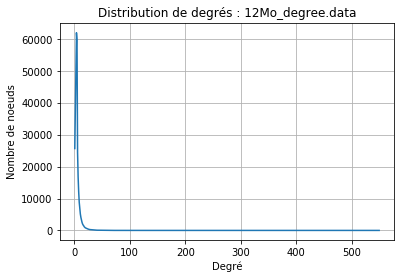

22.064555406570435
2.1245059967041016
2.08176851272583
1.7733349800109863
Connected_Components = [334863]
3.930981397628784
667129


In [12]:
fichier_propre = "com-amazon.ungraph.txt"
fichier_taille = "12Mo"

start = time.time()
clean_large_data(fichier_propre, fichier_taille + ".data")
print(time.time() - start)

start = time.time()
node_degree(fichier_taille + ".data",fichier_taille + "_degree.data")
print(time.time() - start)

start = time.time()
special = special_quantity(fichier_taille + ".data", fichier_taille + "_degree.data")
print(time.time() - start)

print(special)

start = time.time()
degree_distribution(fichier_taille +"_degree.data", fichier_taille + "_degree_distribution.data")
print(time.time() - start)


start = time.time()
D = adjacency_array(fichier_taille + ".data")
print(time.time() - start)


start = time.time()
edges_list(fichier_taille + ".data")
print(time.time() - start)

'''
start = time.time()
adjacency_matrix(fichier_taille + ".data")
print(time.time() - start)
'''

start = time.time()
C = BFS_connected_components(D)
print(time.time() - start)
print("Connected_Components =", C)


'''
start = time.time()
diameter = BFS_diameter(D)
print(time.time() - start)
print("diametre = ", diametre)
'''
start = time.time()
T = triangles(fichier_taille + ".data")
print(time.time() - start)
print(T)